In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import ants
from tqdm import tqdm

In [7]:
indir = '../Data/020-fmriprepped'
subs = [s for s in os.listdir(indir) if all((s.startswith('sub'),not s.endswith('.html')))]
subs.sort()
print(len(subs))

34


In [8]:
analysis_name = 'DeepCor-ABCD-v5'
analysis_dir = os.path.join('../Data/StudyForrest/ensembles_last_CVAE/',analysis_name)

In [9]:
ofname = os.path.join(analysis_dir,'{name}_S{s}_R{r}_med.nii.gz')

In [10]:
svec = np.arange(len(subs))
rvec = [1,2]

In [11]:
check_done = np.zeros((len(svec),len(rvec)))
for s in svec:
    for r in rvec:
        is_done = [os.path.exists(ofname.format(name='corr2face',s=s,r=r)),
    os.path.exists(ofname.format(name='corr2place',s=s,r=r)),
    os.path.exists(ofname.format(name='contrast_face',s=s,r=r)),
    os.path.exists(ofname.format(name='contrast_place',s=s,r=r))]
        check_done[s,r-1]=np.array(is_done).sum()

<AxesSubplot:>

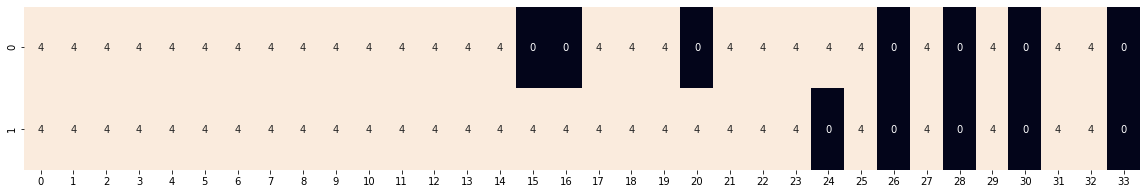

In [12]:
import seaborn as sns
plt.figure(figsize=(20,3))
sns.heatmap(check_done.transpose(),annot=True,cbar=False)

In [51]:
# def safe_load(epi_fn):
#     if os.path.exists(epi_fn):
#         im = ants.image_read(epi_fn)
#         return im

In [43]:
names = ['corr2face','corr2place','contrast_face','contrast_place']
for name in names:
    for s in svec:
        if all([os.path.exists(ofname.format(name='corr2face',s=s,r=1)),os.path.exists(ofname.format(name='corr2face',s=s,r=2))]):
            ims = [ants.image_read(ofname.format(name=name,s=s,r=r)) for r in [1,2]]
            arr = np.array([im.numpy() for im in ims]).mean(axis=0)
            ims[0].new_image_like(arr).to_filename(os.path.join(analysis_dir,'{name}_S{s}_Ravg_med.nii.gz'.format(name=name,s=s)))

In [60]:
for name in names:
    ims = []
    for s in svec:
        fn = os.path.join(analysis_dir,'{name}_S{s}_Ravg_med.nii.gz'.format(name=name,s=s))
        if os.path.exists(fn):
            ims.append(ants.image_read(fn))
    arr = np.array([im.numpy() for im in ims]).mean(axis=0)
    ims[0].new_image_like(arr).to_filename(os.path.join(analysis_dir,'{name}_grandAvg_med.nii.gz'.format(name=name)))